In [4]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [2]:
PATH = '/home/datawork-WW3/HINDCAST/GLOBAL/2020_ERA5/FIELD_NC/'
file = PATH + 'LOPS_WW3-GLOB-30M_202001.nc'

ds = xr.open_dataset(file)
ds

# --- traj ------
lons = np.linspace(-50.,-9.,50)
lats = np.linspace(48.,2,50)
time = ds.time.isel(time=slice(0,50)).values

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 323, time: 248)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.5 -179.0 ... 178.5 179.0 179.5
  * latitude   (latitude) float32 -78.0 -77.5 -77.0 -76.5 ... 82.0 82.5 83.0
  * time       (time) datetime64[ns] 2020-01-01 ... 2020-01-31T21:00:00
Data variables: (12/86)
    MAPSTA     (latitude, longitude) int16 ...
    dpt        (time, latitude, longitude) float32 ...
    ucur       (time, latitude, longitude) float32 ...
    vcur       (time, latitude, longitude) float32 ...
    uwnd       (time, latitude, longitude) float32 ...
    vwnd       (time, latitude, longitude) float32 ...
    ...         ...
    vabr       (time, latitude, longitude) float32 ...
    uubr       (time, latitude, longitude) float32 ...
    vubr       (time, latitude, longitude) float32 ...
    mssu       (time, latitude, longitude) float32 ...
    mssc       (time, latitude, longitude) float32 ...
    mssd       (time, latitude, longitude) float32 ...
Attributes: (12/102)
    WAVEWATCH_III_version_number:     7.00
    WAVEWATCH_III_switches:           F90 NOGRB NC4 SCRIP SCRIPNC SHRD PR3 UQ...
    SIN4 namelist parameter BETAMAX:  1.75
    title:                            WAVEWATCH-III HINDCAST
    netcdf_version:                   4.5.2
    product_name:                     LOPS_WW3-GLOB-30M_202001.nc
    ...                               ...
    P2SF:                             1
    E3D:                              1
    I1P2SF:                           3
    I2P2SF:                           24
    start_date:                       2020-01-01 00:00:00
    stop_date:                        2020-01-31 21:00:00

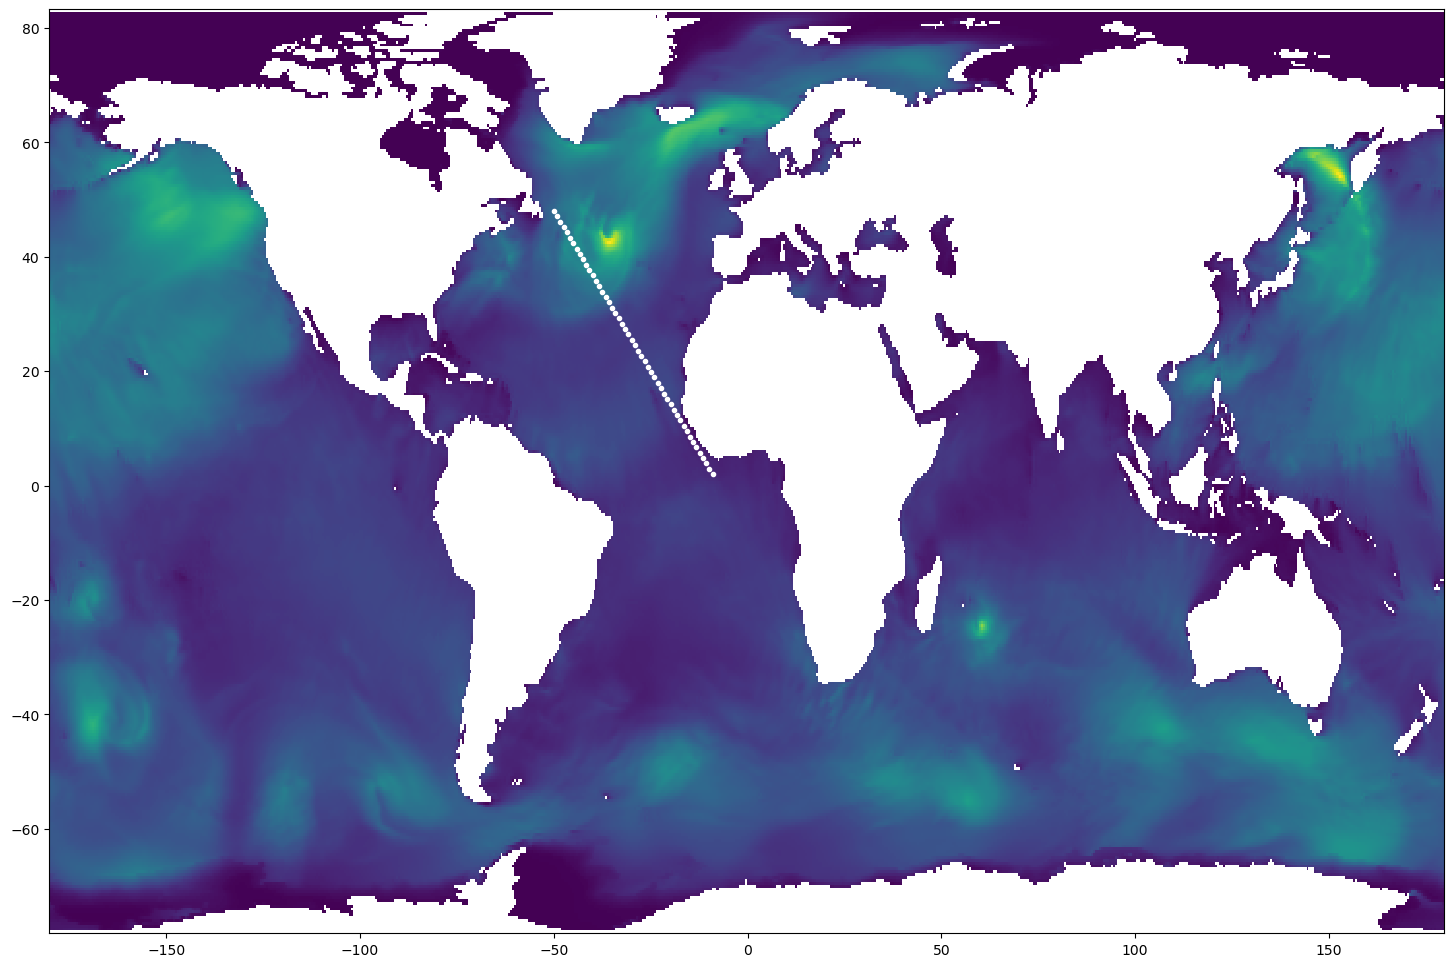

In [22]:
fig,axs = plt.subplots(figsize=(18,12))

plt.pcolormesh(ds.longitude,ds.latitude,ds.isel(time=0).hs,shading='auto')
plt.plot(lons,lats,'.w')

In [6]:
Hs = ds.isel(time=0).hs.values
Hs

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.60800004, 0.61800003, 0.60400003, ..., 0.554     , 0.58400005,
        0.532     ],
       [0.61      , 0.61600006, 0.62200004, ..., 0.58400005, 0.59000003,
        0.6       ],
       ...,
       [0.002     , 0.002     , 0.002     , ..., 0.002     , 0.002     ,
        0.002     ],
       [0.002     , 0.002     , 0.002     , ..., 0.002     , 0.002     ,
        0.002     ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)

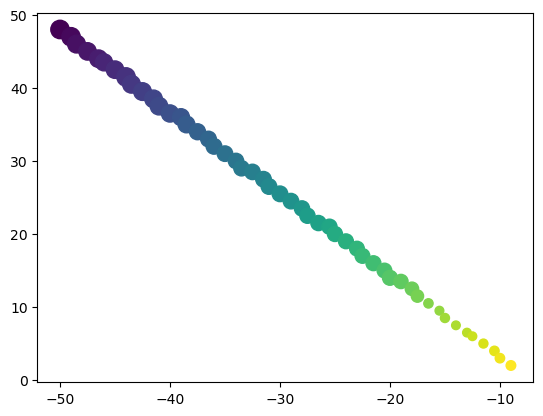

In [19]:
lonsxr = xr.DataArray(xr.DataArray(lons, dims="z"))
latsxr = xr.DataArray(xr.DataArray(lats, dims="z"))
timsxr = xr.DataArray(xr.DataArray(time, dims="z"))


ds0 = ds.hs
ds1 = ds0.sel(time=timsxr,latitude=latsxr,longitude=lonsxr,method='nearest')

plt.scatter(ds1.longitude,ds1.latitude,c=ds1.time,s=ds1*50)
